# **1. Data Exploration and Preprocessing**

•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).

•	Handle missing values as per the best practices (imputation, removal, etc.).

•	Apply scaling techniques to numerical features:

•	Standard Scaling

•	Min-Max Scaling

•	Discuss the scenarios where each scaling technique is preferred and why


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [36]:
# Load the dataset
df = pd.read_csv('/content/adult_with_headers.csv')

In [37]:
# 1. Basic Data Exploration
df.head()  # view some rows

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
df.describe()  # Summary statistics

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
df.info()     # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
df.shape

(32561, 15)

In [41]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [42]:
df.isnull().sum()  # Missing values count

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


There are no missing values in this dataset, so i can skip this step of handling missing values ( imputation & Removal ).

In [43]:
# Identify numerical columns
df.select_dtypes(include=np.number).columns.tolist()  #The quickly see the names of the numeric variables in the DataFrame without seeing their actual values.


['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [44]:
# 3. Scaling Techniques
# Standard Scaling
standard_scaler = StandardScaler()
df['age_standard_scaled'] = standard_scaler.fit_transform(df[['age']])
df['age_standard_scaled']

,age_standard_scaled
0,0.030671
1,0.837109
2,-0.042642
3,1.057047
4,-0.775768
...,...
32556,-0.849080
32557,0.103983
32558,1.423610
32559,-1.215643


**Standard Scaling:**

When to Use: Standard Scaling is useful when the features have different scales but are expected to follow a normal distribution. It centers the data to have a mean of 0 and a standard deviation of 1.

Why: This is particularly useful in algorithms that assume the data is normally distributed or in cases where outliers are not a major concern.

In [45]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df['age_min_max_scaled'] = min_max_scaler.fit_transform(df[['age']])
df['age_min_max_scaled']

,age_min_max_scaled
0,0.301370
1,0.452055
2,0.287671
3,0.493151
4,0.150685
...,...
32556,0.136986
32557,0.315068
32558,0.561644
32559,0.068493


**Min-Max Scaling:**

When to Use: Min-Max Scaling is preferred when you need to normalize the data to a specific range, typically [0, 1]. This is especially useful in algorithms that require bounded data, such as neural networks or algorithms sensitive to the scale of input features.

Why: It preserves the relationships between data points, which is important when the distribution of the data is unknown or when working with algorithms that do not make assumptions about the distribution of the data.

## **2. Encoding Techniques:**

•	Apply One-Hot Encoding to categorical variables with less than 5 categories.

•	Use Label Encoding for categorical variables with more than 5 categories.

•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [46]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [47]:
# 1. One-Hot Encoding for categorical variables with less than 5 categories
categorical_columns = ['sex', 'marital_status', 'workclass']  # Example of categorical variables
ohe = OneHotEncoder(sparse=False, drop='first')
encoded_columns = ohe.fit_transform(df[categorical_columns])

In [48]:
# Add the new encoded columns back into the dataframe
ohe_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(categorical_columns)) # Use get_feature_names_out()
df = pd.concat([df, ohe_df], axis=1)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,marital_status_ Separated,marital_status_ Widowed,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
# 2. Label Encoding for categorical variables with more than 5 categories
label_encoder = LabelEncoder()
df['education_label_encoded'] = label_encoder.fit_transform(df['education'])
df['education_label_encoded']

,education_label_encoded
0,9
1,9
2,11
3,1
4,9
...,...
32556,7
32557,11
32558,11
32559,11


In [50]:
# Pros and Cons:
# - One-Hot Encoding: Pros: Works well with nominal data (unordered categories), avoids assuming ordinal relationships. Cons: Increases dimensionality, not scalable for high-cardinality features.
# - Label Encoding: Pros: Efficient and maintains ordinal relationships. Cons: Can introduce unintended ordinal relationships when applied to nominal data.

# **3. Feature Engineering**

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [51]:
# Create at least 2 new features

df['age_group'] = pd.cut(df['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100'])
df['hours_per_week_group'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])

print("Data with new features:\n", df[['age', 'age_group', 'hours_per_week', 'hours_per_week_group']].head())

Data with new features:
    age age_group  hours_per_week hours_per_week_group
0   39     26-50              40                21-40
1   50     26-50              13                 0-20
2   38     26-50              40                21-40
3   53     51-75              40                21-40
4   28     26-50              40                21-40


In [52]:
# Apply a transformation to a skewed numerical feature
# Let's apply a log transformation to the capital_gain feature if it's skewe

# Check skewness
print("Skewness of capital_gain:", df['capital_gain'].skew())

Skewness of capital_gain: 11.953847687699799


In [53]:
# Apply log transformation
df['capital_gain_log'] = np.log1p(df['capital_gain'])

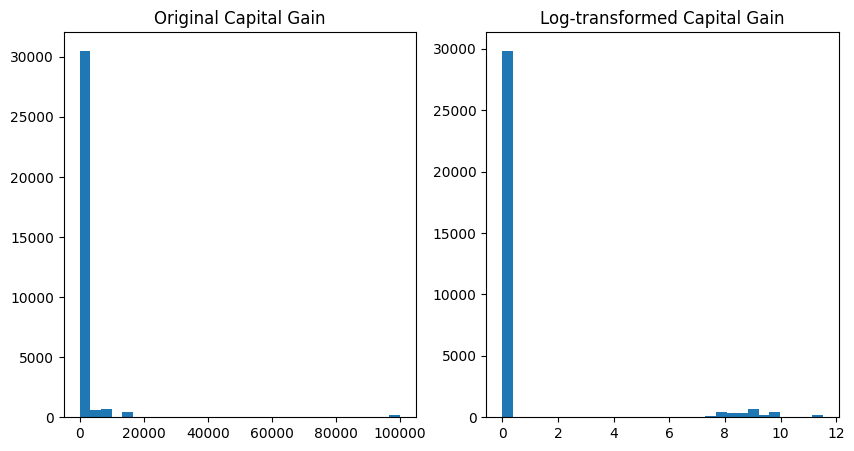

In [54]:
import matplotlib.pyplot as plt

# Plot to visualize the effect
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['capital_gain'], bins=30)
plt.title('Original Capital Gain')
plt.subplot(1, 2, 2)
plt.hist(df['capital_gain_log'], bins=30)
plt.title('Log-transformed Capital Gain')
plt.show()

# **4. Feature Selection:**
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [55]:
!pip install ppscore
import warnings
warnings.filterwarnings('ignore')
# Install the ppscore package using pip

In [56]:
from sklearn.ensemble import IsolationForest
import ppscore as pps # Now the module should be found
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# 1. Isolation Forest for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outliers'] = iso_forest.fit_predict(df[['age', 'capital_gain', 'hours_per_week']])

In [58]:
# Remove outliers (those with a value of -1 in 'outliers')
df_cleaned = df[df['outliers'] != -1]
df_cleaned
# Outliers impact model performance as they can skew the data and make models less generalizable.
# By removing them, we make the data cleaner and more suitable for most algorithms.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_label_encoded,age_group,hours_per_week_group,capital_gain_log,outliers
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,1.0,0.0,9,26-50,21-40,7.684784,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,1.0,0.0,0.0,9,26-50,0-20,0.000000,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,1.0,0.0,0.0,0.0,0.0,11,26-50,21-40,0.000000,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,1.0,0.0,0.0,0.0,0.0,1,51-75,21-40,0.000000,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,1.0,0.0,0.0,0.0,0.0,9,26-50,21-40,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,...,1.0,0.0,0.0,0.0,0.0,15,0-25,21-40,0.000000,1
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,1.0,0.0,0.0,0.0,0.0,7,26-50,21-40,0.000000,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,1.0,0.0,0.0,0.0,0.0,11,26-50,21-40,0.000000,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,1.0,0.0,0.0,0.0,0.0,11,51-75,21-40,0.000000,1


Outliers can negatively impact model performance by skewing the results, leading to inaccurate predictions. For models like linear regression, outliers can distort the line of best fit, making the model less reliable. In clustering, outliers can mislead the algorithm, causing poor grouping. Handling outliers properly improves model accuracy.

In [59]:
# 2. Predictive Power Score (PPS) Analysis
pps_matrix = pps.matrix(df_cleaned)
print(pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False))

                       x                                   y  ppscore
0                    age                                 age      1.0
203       marital_status   marital_status_ Married-AF-spouse      1.0
380         capital_gain                        capital_gain      1.0
350                  sex                           sex_ Male      1.0
342                  sex                                 sex      1.0
..                   ...                                 ...      ...
585  age_standard_scaled                workclass_ State-gov      0.0
586  age_standard_scaled              workclass_ Without-pay      0.0
587  age_standard_scaled             education_label_encoded      0.0
75                fnlwgt                           workclass      0.0
56             workclass  marital_status_ Married-civ-spouse      0.0

[1369 rows x 3 columns]


In [60]:
# Compare PPS to correlation matrix:
# - PPS measures predictive power, not just linear relationships like correlation.
# - Correlation only identifies linear relationships, while PPS can identify both linear and non-linear predictive patterns.

In [61]:
# Compare with correlation matrix
correlation_matrix =df_cleaned.corr()
correlation_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_standard_scaled,age_min_max_scaled,sex_ Male,marital_status_ Married-AF-spouse,...,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_label_encoded,capital_gain_log,outliers
age,1.000000,-0.070270,0.034726,0.060579,0.066524,0.147606,1.000000,1.000000,0.092298,-0.016155,...,0.068986,-0.020088,-0.176665,0.094408,0.131768,0.021122,0.013945,-0.008278,0.056578,NaN
fnlwgt,-0.070270,1.000000,-0.046654,-0.002186,-0.010352,-0.019328,-0.070270,-0.070270,0.029467,-0.000419,...,-0.004459,0.005070,0.040553,-0.025347,-0.035729,-0.015125,-0.003091,-0.029743,-0.003624,NaN
education_num,0.034726,-0.046654,1.000000,0.071845,0.086722,0.145568,0.034726,0.034726,0.003278,0.002661,...,0.104504,-0.015477,-0.122737,0.065520,0.017881,0.105638,-0.007716,0.356371,0.049511,NaN
capital_gain,0.060579,-0.002186,0.071845,1.000000,-0.047863,0.055988,0.060579,0.060579,0.055679,0.001669,...,0.022463,-0.003269,-0.015448,0.016195,-0.004417,0.011612,0.001183,0.014951,0.928065,NaN
capital_loss,0.066524,-0.010352,0.086722,-0.047863,1.000000,0.063129,0.066524,0.066524,0.048855,-0.005741,...,0.015561,-0.003314,-0.030779,0.036676,0.022955,-0.003370,-0.004517,0.016759,-0.053001,NaN
hours_per_week,0.147606,-0.019328,0.145568,0.055988,0.063129,1.000000,0.147606,0.147606,0.237781,-0.000345,...,0.016312,-0.016101,-0.032228,0.126245,0.089046,-0.024464,-0.012166,0.054954,0.047454,NaN
age_standard_scaled,1.000000,-0.070270,0.034726,0.060579,0.066524,0.147606,1.000000,1.000000,0.092298,-0.016155,...,0.068986,-0.020088,-0.176665,0.094408,0.131768,0.021122,0.013945,-0.008278,0.056578,NaN
age_min_max_scaled,1.000000,-0.070270,0.034726,0.060579,0.066524,0.147606,1.000000,1.000000,0.092298,-0.016155,...,0.068986,-0.020088,-0.176665,0.094408,0.131768,0.021122,0.013945,-0.008278,0.056578,NaN
sex_ Male,0.092298,0.029467,0.003278,0.055679,0.048855,0.237781,0.092298,0.092298,1.000000,-0.015642,...,-0.035992,0.001591,-0.029400,0.078751,0.104351,-0.019764,-0.002126,-0.030436,0.047904,NaN
marital_status_ Married-AF-spouse,-0.016155,-0.000419,0.002661,0.001669,-0.005741,-0.000345,-0.016155,-0.016155,-0.015642,1.000000,...,-0.006875,-0.000392,0.000402,-0.004624,-0.002592,0.000908,-0.000534,0.002487,-0.000487,NaN
